In [19]:
import pandas as pd
full_df = pd.read_csv('./data/0057.perovskitedata_DRPFeatures_2020-07-02.csv')

0.9132075471698113
0.08679245283018867


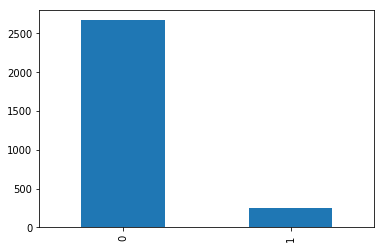

In [27]:
distribution_header = '_raw_modelname'
amine_header = '_rxn_organic-inchikey'
score_header = '_out_crystalscore'
viable_amines = ['ZEVRFFCPALTVDN-UHFFFAOYSA-N',
                              'KFQARYBEAKAXIC-UHFFFAOYSA-N',
                              'NLJDBTZLVTWXRG-UHFFFAOYSA-N',
                              'LCTUISCIGMWMAT-UHFFFAOYSA-N',
                              'JERSPYRKVMAEJY-UHFFFAOYSA-N',
                              'JMXLWMIFDJCGBV-UHFFFAOYSA-N',
                              'VAWHFUNJDMQUSB-UHFFFAOYSA-N',
                              'WGYRINYTHSORGH-UHFFFAOYSA-N',
                              'FCTHQYIDLRRROX-UHFFFAOYSA-N',
                              'VNAAUNTYIONOHR-UHFFFAOYSA-N',
                              'KOAGKPNEVYEZDU-UHFFFAOYSA-N',
                              'FJFIJIDZQADKEE-UHFFFAOYSA-N',
                              'XFYICZOIWSBQSK-UHFFFAOYSA-N',
                              'KFXBDBPOGBBVMC-UHFFFAOYSA-N',
                              'HBPSMMXRESDUSG-UHFFFAOYSA-N',
                              'NXRUEVJQMBGVAT-UHFFFAOYSA-N',
                              'CALQKRVFTWDYDG-UHFFFAOYSA-N',
                              'LLWRXQXPJMPHLR-UHFFFAOYSA-N',
                              'BAMDIFIROXTEEM-UHFFFAOYSA-N',
                              'XZUCBFLUEBDNSJ-UHFFFAOYSA-N']
dimethyl_ammonium = ['JMXLWMIFDJCGBV-UHFFFAOYSA-N']
cal = ['CALQKRVFTWDYDG-UHFFFAOYSA-N']
koa = ['KOAGKPNEVYEZDU-UHFFFAOYSA-N']
fct = ['FCTHQYIDLRRROX-UHFFFAOYSA-N']
df = full_df[full_df[distribution_header].str.contains('Uniform')]
#df = df[df[amine_header].isin(viable_amines)]
#df = df[df[amine_header].isin(koa)]
SUCCESS=4
df[score_header] = [1 if val == SUCCESS else 0 for val in df[score_header].values]
plot = df[score_header].value_counts().plot(kind='bar')
val_counts = df[score_header].value_counts()
print(val_counts[0]/len(df))
print(val_counts[1]/len(df))

In [4]:
gbl_only = df[df['_solv_GBL']==1]
dmso_only = df[df['_solv_DMSO']==1]
dmf_only = df[df['_solv_DMF']==1]

In [5]:
print(len(gbl_only[amine_header].unique().tolist()))
print(len(dmso_only[amine_header].unique().tolist()))
print(len(dmf_only[amine_header].unique().tolist()))
print(len(df[amine_header].unique().tolist()))


1
0
0
1


In [6]:
amines = gbl_only[amine_header].unique().tolist()
for amine in amines:
    print(gbl_only[gbl_only[amine_header]==amine][score_header].unique())

[0 1]


In [7]:
# Analyzing Phase 1 dataset
from pathlib import Path
from utils.dataset_class import DataSet, Setting, Phase2DataSet
import pickle

phase2_dataset_path = Path('./data/phase2_dataset.pkl')
phase2_dataset = pickle.load(phase2_dataset_path.open('rb'))


In [16]:
#for i in range(5):
data = phase2_dataset.get_dataset('ALHk', 0, 'random')
print(len(data['KOAGKPNEVYEZDU-UHFFFAOYSA-N']['x_t']))
print(data['KOAGKPNEVYEZDU-UHFFFAOYSA-N']['x_t'][1470])
print(data['KOAGKPNEVYEZDU-UHFFFAOYSA-N']['x_t'][1477])
print(data['KOAGKPNEVYEZDU-UHFFFAOYSA-N']['x_t'][1480])

1487
[-0.09611971 -0.2588528   0.51190369 -0.90373014  2.20479276 -0.78258892
  0.51191204 -0.25889356 -0.09622476  0.26046729  0.22981794 -0.34139655
 -0.21394783  0.04608666 -0.20827526  0.1846565  -0.29856519  0.02506712
 -0.14388359 -0.20467458  0.16897199  4.85969821 -0.30801189 -0.57703621
 -0.49155158 -0.92664394  0.17743301  0.65590633  0.82448254 -0.96320288
 -0.28704579 -0.31288513 -0.89737327 -0.08489462 -1.44254458 -0.07747219
 -0.976729   -1.39212708 -0.26365668 -0.67785409 -0.82815934 -0.37686127
 -0.67785409 -0.11365917 -1.29598034  1.04360381 -2.20479276  2.20479276
 -0.76358718  0.28620174 -3.29725583]
[-0.59421771 -0.16576662 -0.45224781  1.10652501 -0.45355737 -0.78258892
 -0.45231547 -0.16582    -0.59423331  0.8830637  -0.65450644 -0.36141095
 -0.43538179 -0.642721   -0.49133534 -0.40222367 -0.18619443 -0.36924709
 -0.20370389 -0.2323903   0.16897199 -0.20577409  0.56106743  0.36603442
  1.02620934  0.48608372 -0.53836278  0.0391495   0.38084536  0.5358596
  0.59090

In [17]:
for i in range(5):
    data = phase2_dataset.get_dataset('ALHk', i, 'random')
    print(data['CALQKRVFTWDYDG-UHFFFAOYSA-N']['y_t'][-10:])

[0 1 0 1 0 0 0 1 0 1]
[0 0 1 1 0 0 0 0 1 0]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 1 0 1 0]
[0 0 0 0 0 0 1 0 0 0]


In [18]:
for i in range(5):
    data = phase2_dataset.get_dataset('ALHk', i, 'random')
    print(data['FCTHQYIDLRRROX-UHFFFAOYSA-N']['y_t'][-10:])

[0 0 1 1 0 0 0 1 0 1]
[0 0 0 1 0 0 0 0 0 0]
[0 1 1 0 0 1 0 0 1 0]
[0 0 0 0 0 0 1 1 0 0]
[0 1 0 0 1 0 0 1 0 0]


In [21]:
amines = ('HBPSMMXRESDUSG-UHFFFAOYSA-N',
 'LLWRXQXPJMPHLR-UHFFFAOYSA-N',
 'NXRUEVJQMBGVAT-UHFFFAOYSA-N',
 'XFYICZOIWSBQSK-UHFFFAOYSA-N')

In [31]:
for amine in amines:
    temp_df = df[df[amine_header]==amine]
    SUCCESS=4
    #temp_df[score_header] = [1 if val == SUCCESS else 0 for val in temp_df[score_header].values]
    #plot = temp_df[score_header].value_counts().plot(kind='bar')
    val_counts = temp_df[score_header].value_counts()
    print(f"{amine}: {val_counts}")

HBPSMMXRESDUSG-UHFFFAOYSA-N: 0    145
1     11
Name: _out_crystalscore, dtype: int64
LLWRXQXPJMPHLR-UHFFFAOYSA-N: 0    28
1     4
Name: _out_crystalscore, dtype: int64
NXRUEVJQMBGVAT-UHFFFAOYSA-N: 0    91
1     5
Name: _out_crystalscore, dtype: int64
XFYICZOIWSBQSK-UHFFFAOYSA-N: 0    74
1     7
Name: _out_crystalscore, dtype: int64
